## 线性表

### 线性表的概念

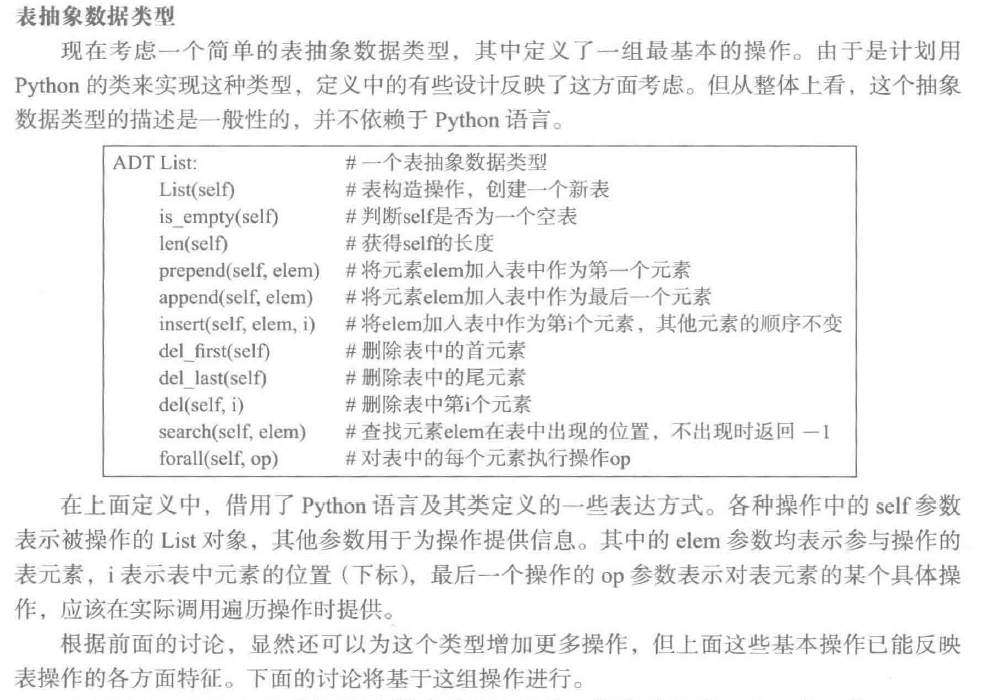
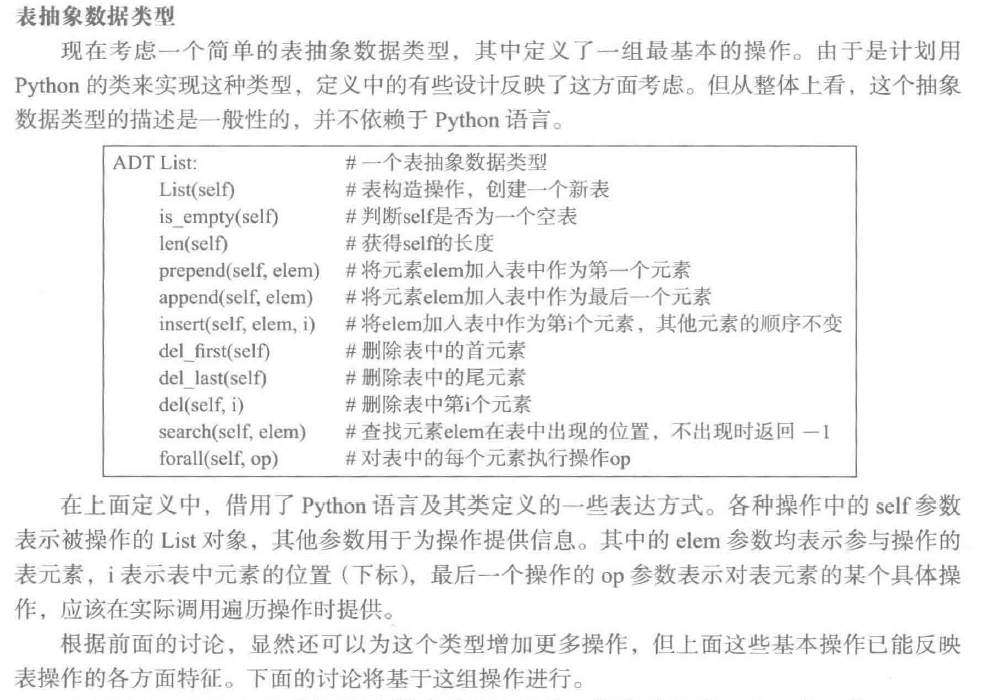

### 顺序表

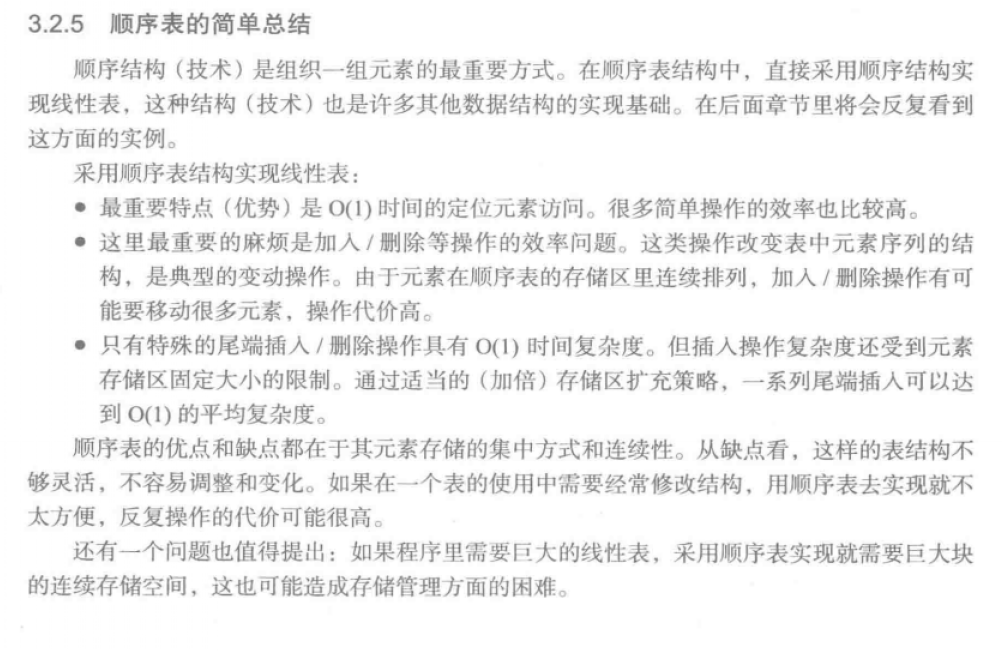

In [ ]:
L = [1,2,2,3,3,3,4,'hsc']

In [ ]:
L.append(5)

In [ ]:
L.count(3)

In [ ]:
L.index(2) #第一个索引值

In [ ]:
#L.pop(index=)
#L.insert(index,obj)
#L.remove

### 链表

#### 单链表

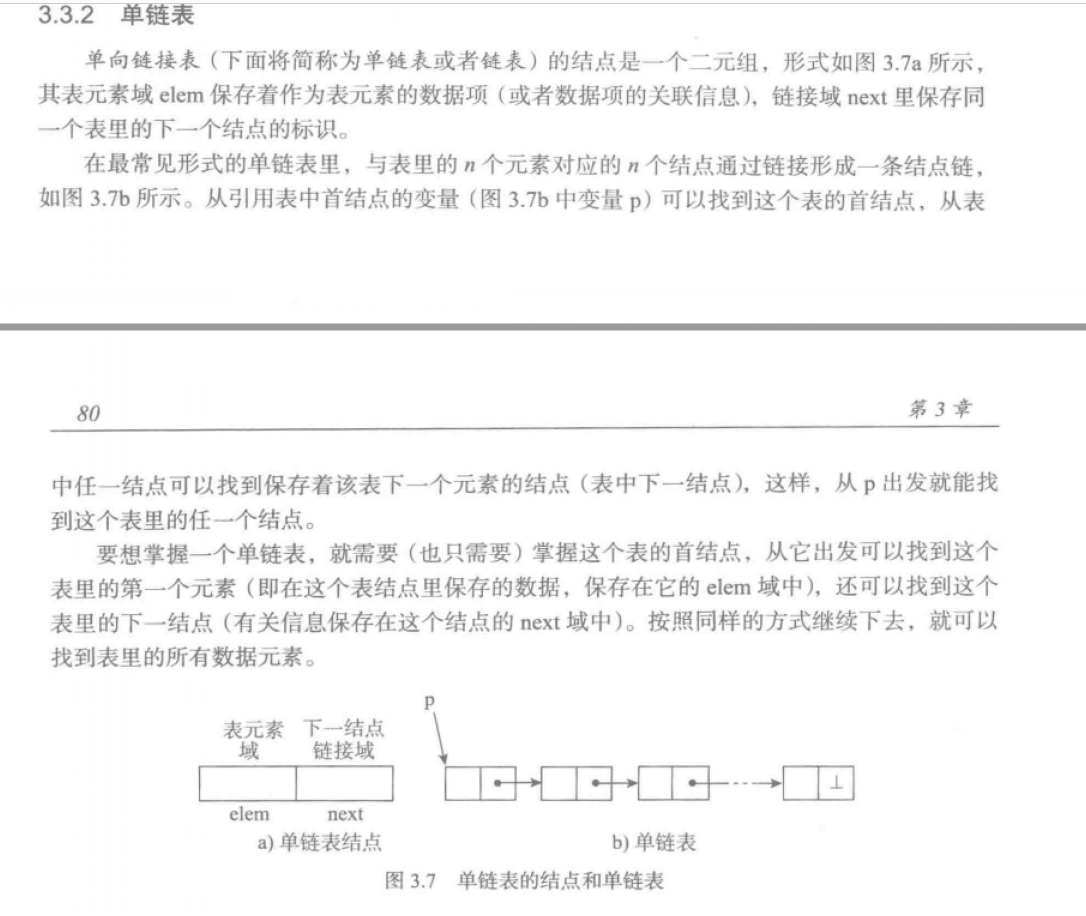

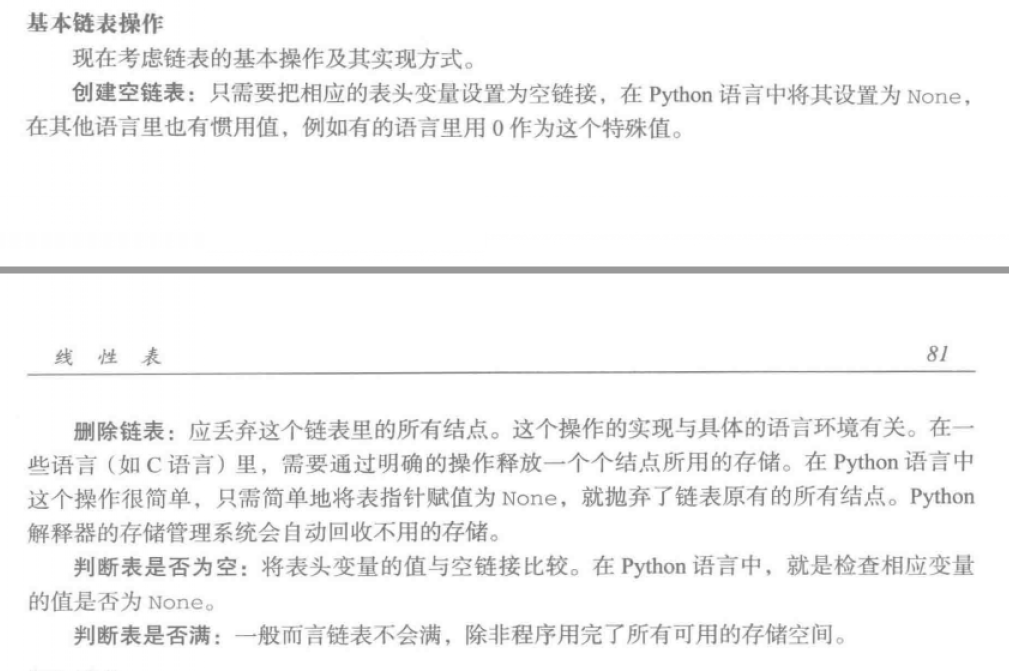

In [ ]:
#单链表节点类
class LNode():
    def __init__(self, elem, next_=None):
        self.elem = elem
        self.next_ = next_
        
#异常类1
class LinkedListunderflow(ValueError):
    pass

#异常类2
class Outofrange(ValueError):
    pass

In [ ]:
#单链表类
class LList():
    def __init__(self): #创建空表
        self._head = None
    
    def delete(self): #删除链表
        self._head = None
        
    def is_empty(self): #是否空表
        return self._head is None
    
    def len(self): #返回长度
        p, n = self._head, 0
        while p is not None:
            n += 1
            p = p.next_
        return n
    
    def get(self, i):#返回第i个元素
        p = self._head
        if p is None:
            return 'NA'
        for j in range(i):
            p = p.next_
            if p is None:
                return 'NA'
        return p.elem
        
    def prepend(self, elem):#表头插入
        self._head = LNode(elem, self._head)
    
    def pop(self): #删除表头节点并返回删除的值
        if self._head is None: #无节点，异常
            raise LinkedListunderflow('in pop')
        e = self._head.elem
        self._head = self._head.next_
        return e         
    
    
    #在表末插入元素
    def append(self, elem):
        if self._head is None: #检查是否空表，相当于直接在表头插入
            self.prepend(elem)
        else:
            p = self._head
            while p.next_ is not None:
                p = p.next_
            p.next_ = LNode(elem)
        
    #删除表末元素
    def pop_last(self):
        if self._head is None: #空表，异常
            raise LinkedListunderflow('in pop')
        p = self._head
        if p.next_ is None: #只有一个元素
            return self.pop() #注意 return
        while p.next_.next_ is not None: #找到倒数第二个元素
            p = p.next_
        e = p.next_.elem
        p.next_ = None
        return e
    
    #插入第i个元素
    def insert(self, i, val):
        p = self._head
        if i < 0 or i > self.len():
            raise Outofrange('out of range')
        elif i == 0:
            self.prepend(val) 
        else:
            for j in range(i-1):
                p = p.next_
        p.next_ = LNode(val, next_=p.next_)
        
    #删除并返回第i个元素
    def del_(self, i):
        p = self._head
        if i < 0 or i > self.len() - 1:
            raise Outofrange('out of range')
        elif i == 0:
            return self.pop()
        elif i == self.len() - 1:
            return self.pop_last()
        else:
            for j in range(i-1):
                p = p.next_ 
        e = p.next_.elem
        p.next_ = p.next_.next_
        return e
    
    #打印
    def printall(self):
        p = self._head
        while p is not None:
            print(p.elem, end='')
            if p.next_ is not None:
                print(',', end=' ')
            p = p.next_
        print('')
        
    # 遍历
    def for_each(self, proc):
        p = self._head
        while p is not None:
            proc(p.elem)
            p = p.next_
            
    #迭代器
    def elements(self):
        p = self._head
        while p is not None:
            yield p.elem
            p = p.next_
            
    #反转
    def rev(self):
        p = None
        while self._head is not None:
            q = self._head
            self._head = self._head.next_#取下首节点
            q.next_  = p 
            p = q 
        self._head = p 
            

In [ ]:
LL = LList()
for i in range(1,10):
    LL.append(i)
LL.printall()

In [ ]:
LL.insert(0,10)
LL.printall()

In [ ]:
LL.del_(7)

In [ ]:
for i in LL.elements():
    print(str(i) + 'a',end=',')

In [ ]:
LL.printall()
LL.rev()
LL.printall()

#### 单链表带尾指针

In [ ]:
class LList_tail(LList):
    
    def __init__(self):
        super().__init__()
        self._tail = None
    
    def delete(self): #删除链表,加一个None
        self._head = None
        self._tail = None
        
    def prepend(self, elem):#表头插入，要考虑空表插入的情况
        if self._head is None:
            self._head = LNode(elem, self._head)
            self._tail = self._head
        else:
            self._head = LNode(elem, self._head)
    
    #在表末插入元素,操作尾指针
    def append(self, elem):
        if self._head is None: #检查是否空表，相当于直接在表头插入
            self.prepend(elem)
        else:
            self._tail.next_ = LNode(elem)
            self._tail = self._tail.next_
        
    #删除表末元素
    def pop_last(self):
        if self._head is None: #空表，异常
            raise LinkedListunderflow('in pop')
        p = self._head
        if p.next_ is None: #只有一个元素
            return self.pop() #注意 return
        while p.next_.next_ is not None: #找到倒数第二个元素
            p = p.next_
        e = p.next_.elem
        p.next_ = None
        self._tail = p
        return e

In [ ]:
L = LList_tail()
L.prepend(1)
L.append(2)
L.printall()

In [ ]:
L.pop_last()
L.printall()

## 栈和队列

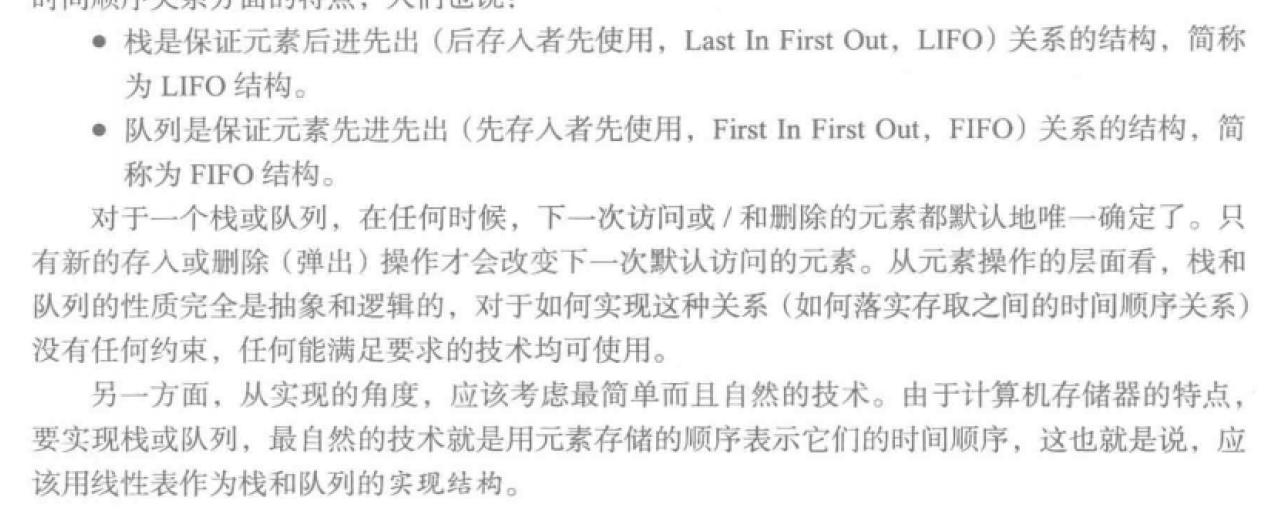

### 栈的顺序表实现

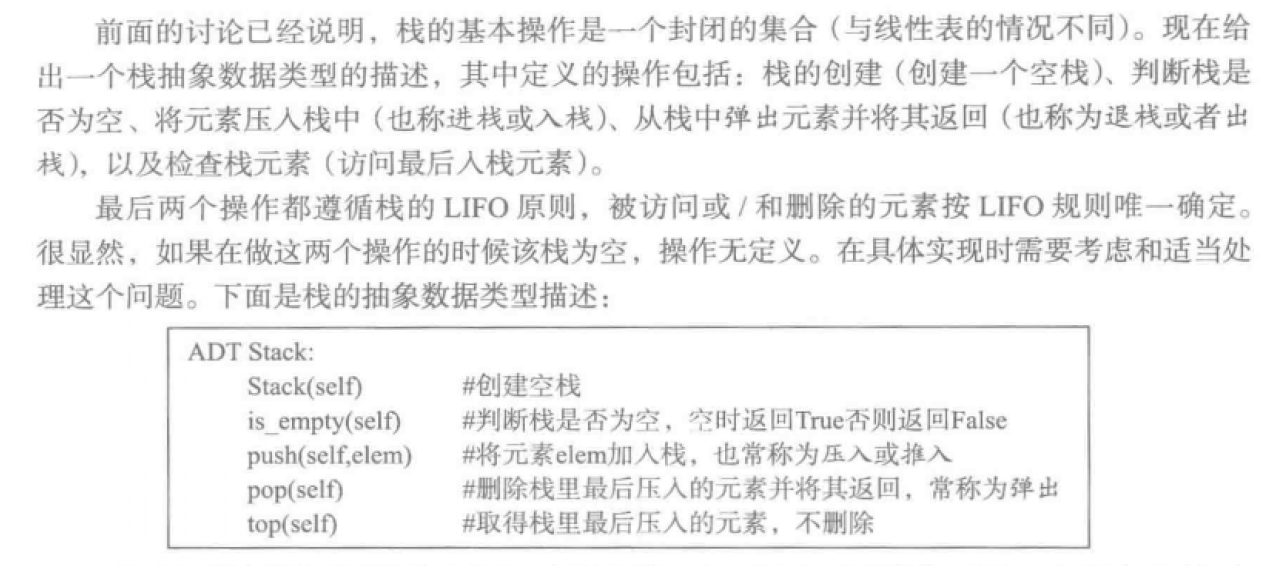

In [ ]:
#使用list来实现栈
#异常类
class StackUnderflow(ValueError):
    pass

In [ ]:
class SStack:
    def __init__(self):
        self._elem = []
        
    def is_empty(self):
        return self._elem == []
    
    def push(self, elem):
        self._elem.append(elem)
        
    def pop(self):
        if self._elem == []:
            raise StackUnderflow('in SStack.pop()')
        return self._elem.pop()
    
    def top(self):
        if self._elem == []:
            raise StackUnderflow('in SStack.top()')
        return self._elem[-1]
        

In [ ]:
st1 = SStack()
st1.is_empty()

In [ ]:
for i in range(1,10):
    st1.push(i)
st1.is_empty()

In [ ]:
while not st1.is_empty():
    print(st1.pop(), end=' ')

### 栈的链表实现

In [ ]:
class StackUnderflow(ValueError):
    pass

#单链表节点类
class LNode():
    def __init__(self, elem, next_=None):
        self.elem = elem
        self.next_ = next_
        
#栈
class LStack():
    def __init__(self):
        self._top = None
        
    def is_empty(self):
        return self._top is None
    
    def push(self, elem):
        self._top = LNode(elem, self._top)
        
    def pop(self):
        if self.is_empty():
            raise StackUnderflow('in SStack.pop()')
        p = self._top.elem
        self._top = self._top.next_
        return p
    
    def top(self):
        if self.is_empty():
            raise StackUnderflow('in SStack.top()')
        p = self._top.elem
        return p
    
    

In [ ]:
st1 = LStack()
st1.is_empty()

In [ ]:
for i in range(1,10):
    st1.push(i)
st1.is_empty()

In [ ]:
while not st1.is_empty():
    print(st1.pop(), end=' ')
st1.is_empty()

### 栈的应用

#### list倒序输出

In [ ]:
list1 = [1,2,3,'hsc','哈哈']
st1 = LStack()
for elem in list1:
    st1.push(elem)
while not st1.is_empty():
    print(st1.pop(), end=',')

#### 括号匹配

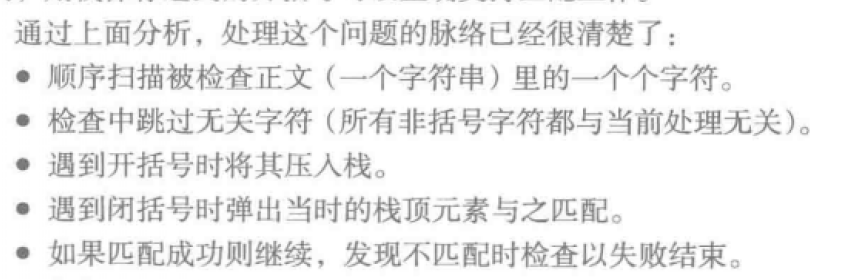

In [ ]:
def check_parens(text):
    parens = '()[]{}'
    open_parens = '([{'
    opposite = {')':'(', ']':'[', '}':'{'}
    plist = []
    
    for word in text:
        if word in parens:
            plist.append(word)
        
    st = LStack()
    for p in plist:
        if p in open_parens:
            st.push(p)
        else:
            try:
                top = st.pop()
            except StackUnderflow:
                print('Unmatching')
                return False
            else:
                if top != opposite[p]:
                    print('Unmatching')
                    return False

    if st.is_empty():
        print('Matching')
        return True
    else:
        print('Unmatching')
        return False

In [ ]:
text = '({a[{}b]}123)'
check_parens(text)

In [ ]:
text = 'ab(c'
check_parens(text)

In [ ]:
text = ')]'
check_parens(text)

### 队列的链表实现

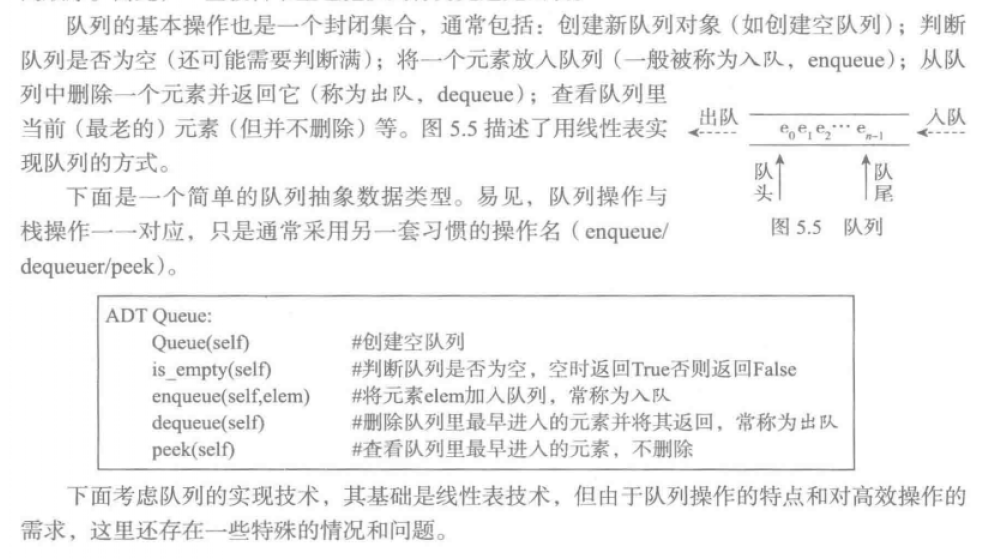

In [ ]:
#单链表节点类
class LNode():
    def __init__(self, elem, next_=None):
        self.elem = elem
        self.next_ = next_
        
#异常类1
class LinkedListunderflow(ValueError):
    pass

class LQueue():
    
    def __init__(self):
        self._head = None
        self._tail = None
        
    def is_empty(self):
        return self._head is None

    #表尾入队
    def enqueue(self, elem):
        if self._head is None: #检查是否空表，相当于直接在表头插入
            self._head = LNode(elem, self._head)
            self._tail = self._head
        else:
            self._tail.next_ = LNode(elem)
            self._tail = self._tail.next_
        
    #表头出队 
    def dequeue(self): #删除表头节点并返回删除的值
        if self._head is None: #无节点，异常
            raise LinkedListunderflow('in dequeue')
        e = self._head.elem
        self._head = self._head.next_
        return e  
    
    def peek(self):
        return self._head.elem

In [ ]:
L = LQueue()

In [ ]:
for i in range(10,0,-1):
    L.enqueue(i)
L.peek()

In [ ]:
while not L.is_empty():
    print(L.dequeue(), end=',')

### 队列的顺序表实现

## 树

### 优先队列和堆

#### list实现优先队列

In [1]:
class PriorQueueError(ValueError):
    pass

class PriorQueue():
    def __init__(self, elist = []):
        self._elems = list(elist)
        self._elems.sort(reverse = True)#以较小的元素作为优先
    
    def enqueue(self, e):
        i = len(self._elems) - 1
        while i >= 0: #用< 可保证优先度相同，先进先出
            if e <= self._elems[i]:
                break
            else:
                i -= 1
            self._elems.insert(i+1, e)
    
    def is_empty(self):
        return self._elems == []

    def peek(self):
        if self.is_empty():
            raise PriorQueueError('in pop')
        return self._elems[-1]
    
    def dequeue(self):
        if self.is_empty():
            raise PriorQueueError('in pop')
        return self._elems.pop()

In [2]:
PQ = PriorQueue([1,4,2,7,98,3])

#### 堆和优先队列

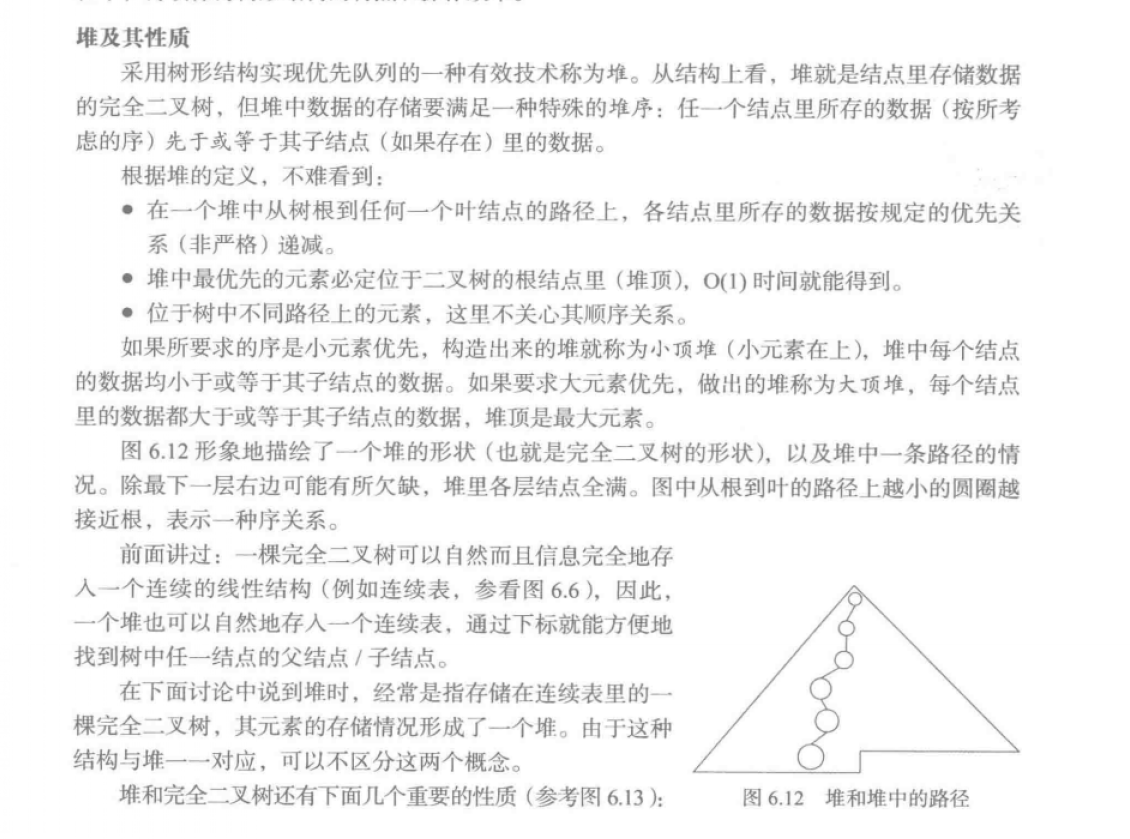

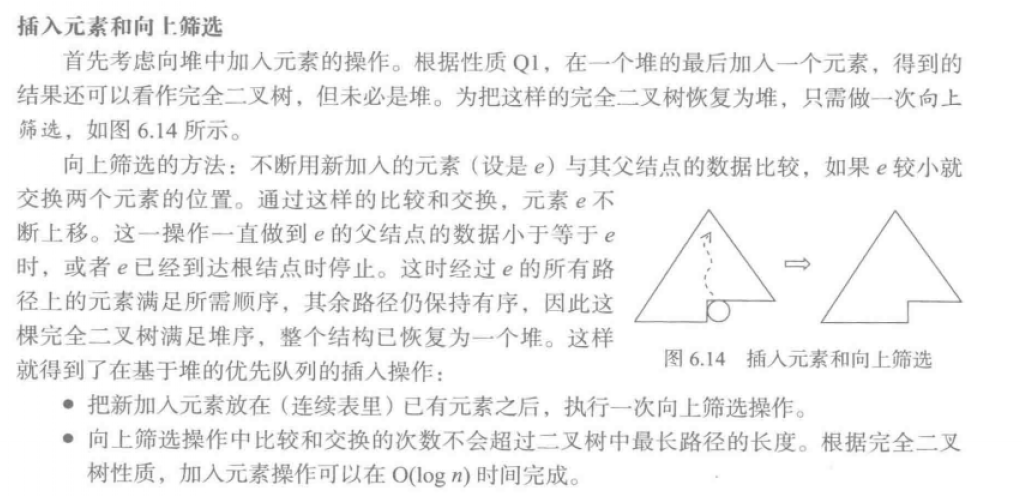

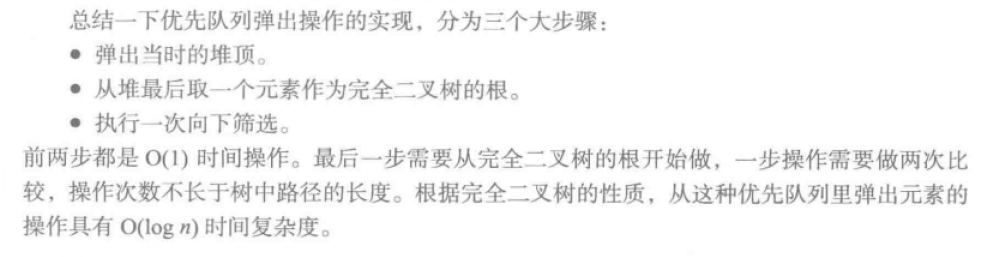
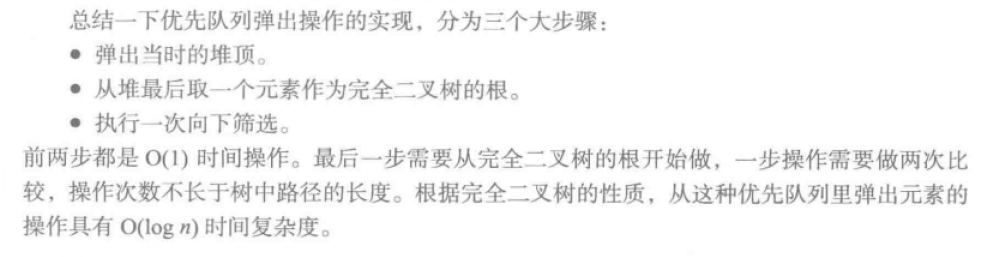

parent(i) = floor((i - 1)/2)  
left(i)   = 2i + 1  
right(i)  = 2i + 2  

In [5]:
#基于堆的优先队列
class PriorQueueError(ValueError):
    pass

class PriQueHeap():
    def __init__(self, elist=[]):
        self._elem = []
        self.buildheap(list(elist))
        
    def is_empty(self):
        return not self._elem
    
    def peek(self):
        if self.is_empty():
            raise PriorQueueError('in peek')
        return self._elem[0]
    
    #入队
    def enqueue(self, e):
        self._elem.append(e)
        self.siftup()
    
    
    
    #向上筛选，从最后一个元素
    def siftup(self):
        child = len(self._elem) - 1
        while child > 0:
            parent = (child - 1) // 2 #父节点的关系
            if self._elem[parent] > self._elem[child]:
                self._elem[parent], self._elem[child] = self._elem[child], self._elem[parent]
                child = parent
            else:
                break
    
    #弹出元素
    def dequeue(self):
        if self.is_empty():
            raise PriorQueueError('in peek')
        
        head_val = self._elem[0]
        self._elem[0] = self._elem[-1]#把最后一个点放在头上
        self._elem.pop()#把最后一个弹出去
        self.siftdown()#向下筛选一次
        return head_val
        
    def siftdown(self):
        parent = 0
        lth = len(self._elem) - 1
        
        while 2 * parent + 1 <= lth:
            left_child = 2 * parent + 1
            right_child = 2 * parent + 2
            #没有右节点，只需要和左节点再比较一次
            if right_child > lth and self._elem[parent] > self._elem[left_child]:
                self._elem[parent], self._elem[left_child] = self._elem[left_child], self._elem[parent]
                break
            #parent 最小，直接结束
            if self._elem[parent] <= self._elem[left_child] and self._elem[parent] <= self._elem[right_child]:
                break
            #找left 和 right 中小的那一个
            elif self._elem[left_child] <= self._elem[right_child]:#left 小
                self._elem[parent], self._elem[left_child] = self._elem[left_child], self._elem[parent]
                parent = left_child
            else:
                self._elem[parent], self._elem[right_child] = self._elem[right_child], self._elem[parent]
                parent = right_child
    #构建堆
    def buildheap(self, lst):
        for val in lst:
            self.enqueue(val)

In [13]:
lst = [3,5,7,8,1,1,2,4,4,10,20]
myheap = PriQueHeap(lst)

In [8]:
myheap.enqueue(0)

In [14]:
while myheap.is_empty() is False:
    e = myheap.dequeue()
    print(e)

1
1
2
3
4
4
5
7
8
10
20


In [11]:
myheap._elem

[0, 3, 1, 4, 5, 1, 2, 8, 4, 10, 20, 7]

### 二叉树

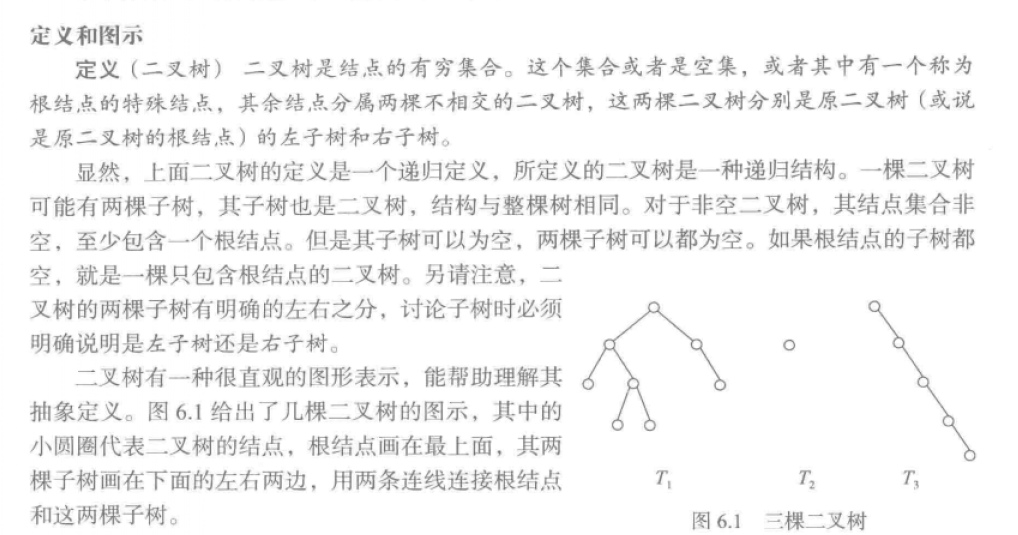

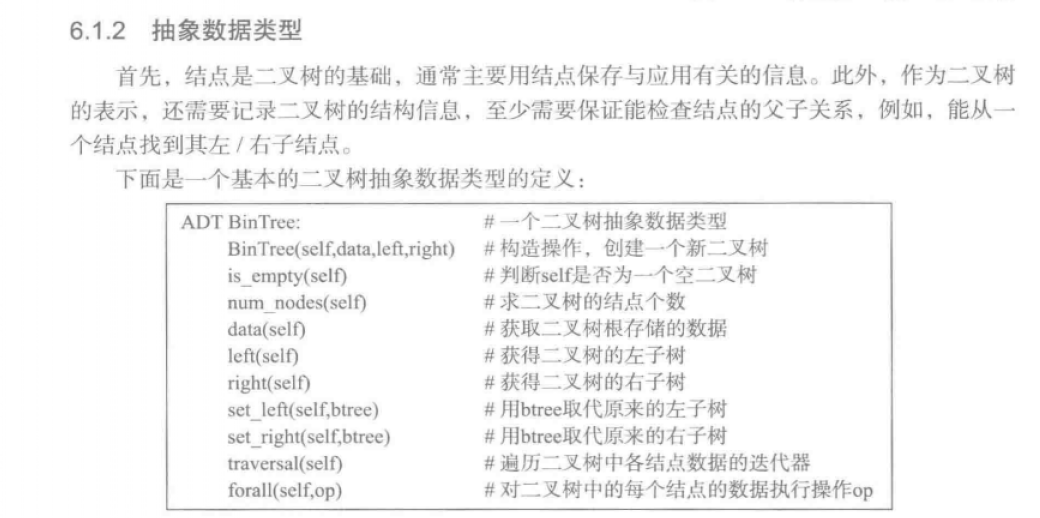

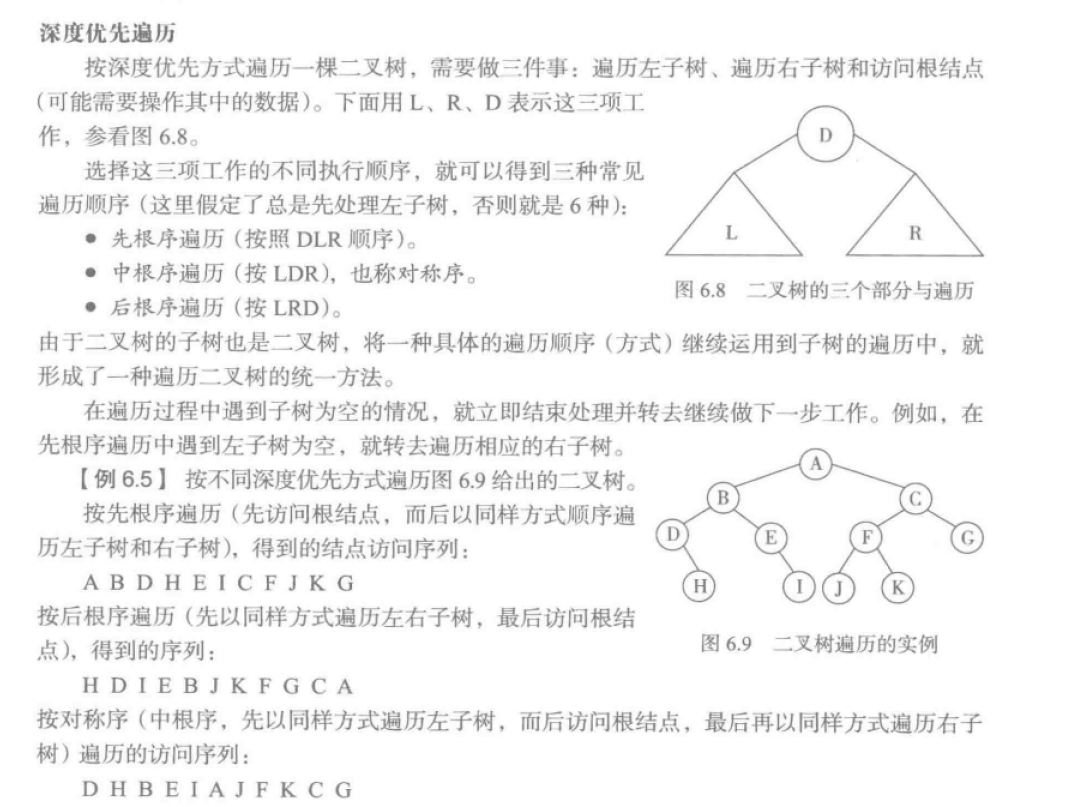

#### 二叉树的list实现

空树用None表示
非空二叉树节点用[d, l, r] 表示，l，r分别是两棵子树。

#### 二叉树的类实现


In [ ]:
#二叉树节点类
class BinTNode:
    def __init__(self, dat, left = None, right = None):
        self.data = dat
        self.left = left
        self.right = right

In [ ]:
# 统计节点个数,利用递归的思想
def count_BinTNode(t):
    if t is None:
        return 0
    else:
        return 1 + count_BinTNode(t.left) + count_BinTNode(t.right)

#节点求和    
def sum_BinTNode(t):
    if t is None:
        return 0
    else:
        return t.data + sum_BinTNode(t.left) + sum_BinTNode(t.right)        

#先序遍历，操作
def preorder_op(t, proc): # proc是一个操作
    if t is None:
        return
    proc(t.data)
    preorder(t.left, proc)
    preorder(t.right, proc)

#先序遍历，打印
def pre_print_all(t):
    if t is None:
        return
    else:
        print(t.data, end=',')
    pre_print_all(t.left)
    pre_print_all(t.right)
    
#中序遍历，打印
def mid_print_all(t):
    if t is None:
        return
    else:
        mid_print_all(t.left)
    print(t.data, end=',')
    mid_print_all(t.right)
    
#后序遍历，打印
def aft_print_all(t):
    if t is None:
        return
    else:
        aft_print_all(t.left)
    aft_print_all(t.right)
    print(t.data, end=',')
    
#广度优先遍历，操作，用到队列的思想
def BFS(t, op):
    Queue = []
    Queue.append(t)
    while len(Queue) !=0:
        top = Queue.pop(0)
        if top is None:
            continue
        else:
            op(top.data)
            Queue.append(top.left)
            Queue.append(top.right)

#广度优先遍历，打印，用到队列的思想
def BFS_print(t):
    Queue = []
    Queue.append(t)
    while len(Queue) !=0:
        top = Queue.pop(0)
        if top is None:
            continue
        else:
            print(top.data, end=' ')
            Queue.append(top.left)
            Queue.append(top.right)

#迭代遍历器， 要用到栈的思想，深度优先，先序
def pre_elements(t):
    stack = []
    while t is not None or stack != []:
        while t is not None:
            yield t.data
            stack.append(t.right)
            t = t.left
        if stack != []:
            t = stack.pop()

#迭代遍历，深度优先，中序
def mid_elements(t):
    stack = []
    cur = t 
    while cur is not None or stack != []:
        while cur is not None:
            stack.append(cur)
            cur = cur.left
        if stack != []:
            top = stack.pop()
            yield top.data
            cur = top.right
            

#广度优先遍历器
def b_elements(t):
    Queue = []
    Queue.append(t)
    while len(Queue) !=0:
        top = Queue.pop(0)
        if top is None:
            continue
        else:
            yield top.data
            Queue.append(top.left)
            Queue.append(top.right)

In [ ]:
t1 = BinTNode(1, BinTNode(2), BinTNode(3))
t2 = BinTNode(4, BinTNode(5), BinTNode(6))
t = BinTNode(0, t1,t2)
count_BinTNode(t)

In [ ]:
mid_print_all(t)

In [ ]:
for i in mid_elements(t):
    print(i, end=',')

In [ ]:
BFS(t, print)

In [ ]:
BFS_print(t)

In [ ]:
for i in d_elements(t):
    print(i, end=' ')

In [ ]:
for i in b_elements(t):
    print(i, end=' ')

In [ ]:
pre_print_all(t)

In [ ]:
mid_print_all(t)

In [ ]:
aft_print_all(t)

In [ ]:
# 二叉树类
class BinTree():
    def __init__(self):
        self._root = None
        
    def set_root(self, rootnode):#用节点类创建一个树
        self._root = rootnode
        
    def is_empty(self):
        return self._root is None
    
    def root(self):
        return self._root
    
    def leftchild(self):
        return self._root.left
    
    def rightchild(self):
        return self._root.right
    
    def set_left(self, leftchild):
        self._root.left = leftchild
        
    def set_right(self, rightchild):
        self._root.right = rightchild   
    
    #求节点个数
    def count_nodes(self):
        return count_BinTNode(self._root)

    #先序遍历 打印
    def pre_print(self):
        pre_print_all(self._root)
        
    #中序遍历 打印
    def mid_print(self):
        mid_print_all(self._root)
        
    #后序遍历 打印
    def aft_print(self):
        aft_print_all(self._root)
        
    #迭代器
    def tree_elements(self):
        return elements(self._root)
    
#广度优先遍历，打印，用到队列的思想
    def BFS_print(self):
        BFS_print(self._root)          

In [ ]:
bt = BinTree()
t1 = BinTNode(1, BinTNode(2), BinTNode(3))
t2 = BinTNode(4, BinTNode(5), BinTNode(6))
t = BinTNode(0, t1,t2)

In [ ]:
bt.set_root(t)
bt.is_empty()

In [ ]:
bt.count_nodes()

In [ ]:
bt.pre_print()
bt.mid_print()
bt.aft_print()

In [ ]:
for i in bt.tree_elements():
    print(i, end=',')

In [ ]:
bt.BFS_print()

### 哈夫曼树和哈夫曼算法

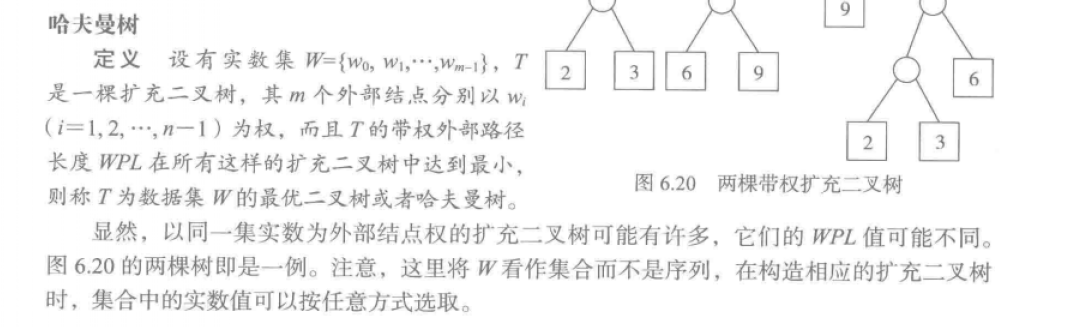

In [ ]:
#二叉树节点类
class BinTNode:
    def __init__(self, dat, left = None, right = None):
        self.data = dat
        self.left = left
        self.right = right
        
#一个根据插入节点的优先队列
def prioenqueue(L, Node):
    if len(L) == 0:
        L.append(Node)
        return
    data = Node.data
    i = len(L) - 1
    while i >= 0:
        if data >= L[i].data:
            i -= 1
        else:
            break
    L.insert(i+1, Node)
    

In [ ]:
def HuffmanTree(weight):
    prilist = []
    for w in weight:
        prioenqueue(prilist, BinTNode(w))
    while len(prilist) > 1:
        t1 = prilist.pop()
        t2 = prilist.pop()
        t = t1.data + t2.data
        prioenqueue(prilist, BinTNode(t, t1,t2))
    return prilist.pop()
        

In [ ]:
weights = [2,3,6,9]
HT = HuffmanTree(weights)
BFS_print(HT)

### 二叉排序树

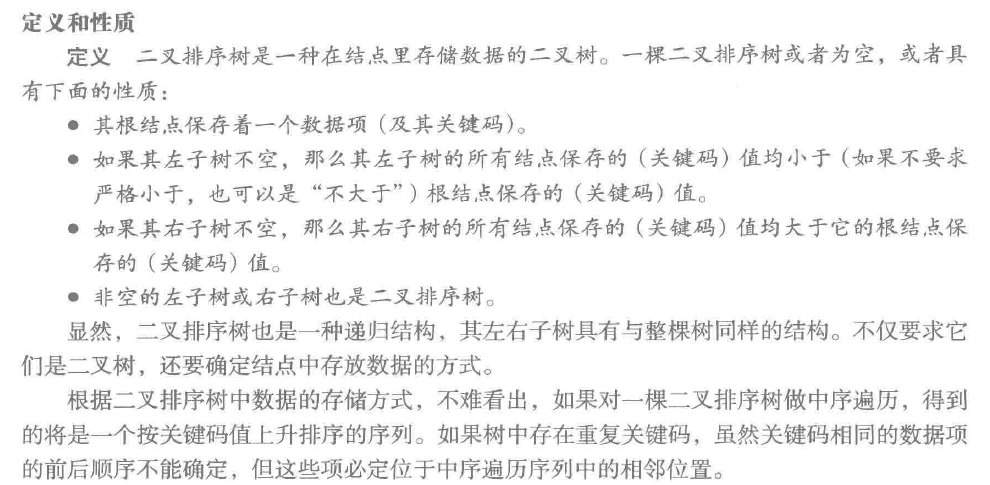

#### 二叉排序树(字典)类

In [ ]:
#二叉树节点类
class BinTNode:
    def __init__(self, dat, left = None, right = None):
        self.data = dat
        self.left = left
        self.right = right
        
"""
二分搜索
def bt_search(btree, key):
    bt = btree
    while bt is not None:
        data = bt.data
        if key  < data.key:
            return bt_search(bt.left)
        elif key > data.key:
            return bt_search(bt.right)
        else:
            return data.value
    return None  #没找到
"""

class Assoc():# key - value 类
    def __init__(self, key, value):
        self.key = key
        self.value = value
        
    def __lt__(self, other):
        return self.key < other.key
    
    def __le__(self, other):
        return self.key < other.key or self.key == other.key
    
    def __str__(self):
        return '({0},{1})'.format(self.key, self.value)
    
    

In [ ]:
a = Assoc(0,'hsc')
b = Assoc(2,'wjq')

In [ ]:
print(a)

In [ ]:
a < b

In [ ]:
class DictBinTree():
    def __init__(self):
        self._root = None
        
    def is_empty(self):
        return self._root is None
    
    def search(self, key):
        bt = btree
        while bt is not None:
            data = bt.data
            if key  < data.key:
                return bt_search(bt.left)
            elif key > data.key:
                return bt_search(bt.right)
            else:
                return data.value
        return None  #没找到
    
    def insert(self, key, value):
        bt = self._root
        if bt is None:
            self_root = BinTNode(Assoc(key, value))
            return
        while True:
            data = bt.data
            if key < data.key:
                if bt.left is None:
                    bt.left = BinTNode(Assoc(key, value))
                    return
                bt = bt.left
                continue
            elif key > data.key:
                if bt.right is None:
                    bt.right = BinTNode(Assoc(key, value))
                    return
                bt = bt.right
                continue
            else:                   #插入重复数据的情况,保留新的数据
                bt.data.value = value
                return
    
    #中序遍历迭代器
    def values(self):
        root = self._root
        stack = []
        while root is not None or len(stack) != 0:
            while root is not None:
                stack.append(root)
                root = root.left
            root = stack.pop(-1)
            yield root.data.value
            root = root.right
                
    #构造
    @classmethod
    def build_dict(cls, entries):
        dic = DictBinTree()
        for k, v in entries:
            dic.insert(k, v)
        return dic

In [ ]:
a=[1,3,5,7,9,2,4,6,8,10]
b = zip(a,a.copy())
DD = DictBinTree.build_dict(b)

In [ ]:
DD.values()

In [ ]:
a=[1,3,5,7,9,2,4,6,8,10]
b = zip(a,a.copy())
for i in DD.values():
    print(f'{i},{j}')

#### 二叉排序树

In [ ]:
#二叉树节点类
class BinTNode:
    def __init__(self, dat, left = None, right = None):
        self.data = dat
        self.left = left
        self.right = right

#中序遍历，打印
def mid_print_all(t):
    if t is None:
        return
    else:
        mid_print_all(t.left)
    print(t.data, end=',')
    mid_print_all(t.right)
    
#右中左遍历，打印
def aft_print_all(t):
    if t is None:
        return
    else:
        aft_print_all(t.right)
    print(t.data, end=',')
    aft_print_all(t.left)
        
class SortBinTree():
    def __init__(self):
        self._root = None
        
    def is_empty(self):
        return self._root is None
    
    def insert(self, value):
        bt = self._root
        if bt is None:
            self._root = BinTNode(value)
            return
        while True:
            data = bt.data
            if value <= data:
                if bt.left is None:
                    bt.left = BinTNode(value)
                    return
                bt = bt.left
                continue
            elif value > data:
                if bt.right is None:
                    bt.right = BinTNode(value)
                    return
                bt = bt.right
                continue
    
    #遍历输出
    def print_res(self, reverse = False):
        if reverse:
            aft_print_all(self._root)
        else:
            mid_print_all(self._root)
   
                
    #构造
    @staticmethod
    def build_bst(entries):
        T = SortBinTree()
        for num in entries:
            T.insert(num)
        return T

In [ ]:
a = [12,3,3,7,9,2,4,6,6,8,10]
sort_res = SortBinTree()
sort_res.is_empty()

In [ ]:
sort_res = SortBinTree.build_bst(a)
sort_res.is_empty()

In [ ]:
sort_res.print_res(reverse= True)

## 哈希表

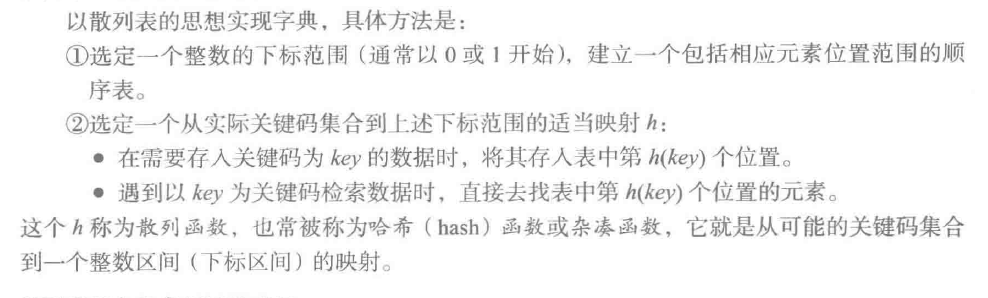

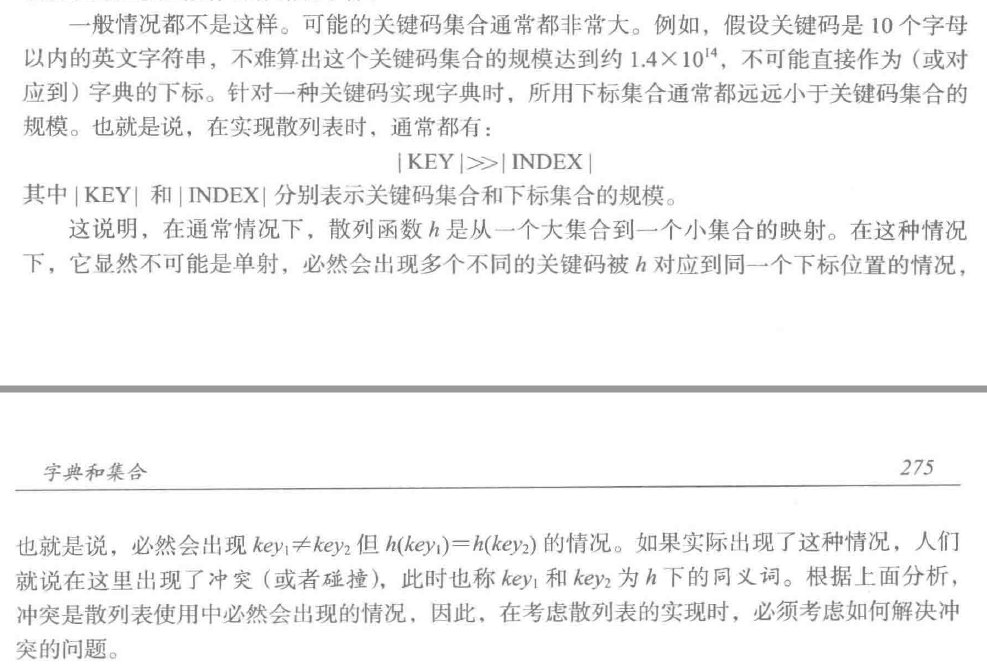

## 排序

In [ ]:
# 记录结构 key - datum,根据key排序
class record():
    def __init__(self, key, datum):
        self.key = key
        self.datum = datum


### 插入排序

In [ ]:
def insert_sort(lst):
    for i in range(1, len(lst)):
        x = lst[i]
        j = i
        while j > 0 and lst[j-1].key > x.key: #j只需要判断到1
            lst[j] = lst[j-1]
            j -= 1
        lst[j] = x

In [ ]:
import numpy as np

In [ ]:
lst = []
rand = np.random.randint(0,100,10)

In [ ]:
for i in rand:
    lst.append(record(i, i))
insert_sort(lst)
for i in lst:
    print(i.key,end=' ')

In [3]:
def insert_sort(lst):
    for i in range(1, len(lst)):
        x = lst[i]
        j = i - 1
        while j >= 0 and lst[j] > x:
            lst[j+1] = lst[j]
            j -= 1
        lst[j+1] = x

In [4]:
import numpy as np
lst = np.random.randint(0,100,20)
lst

array([68, 51, 18, 35, 35, 33, 50, 55, 46, 85, 21, 41, 89, 38, 41, 43, 84,
       10, 99, 17])

In [6]:
insert_sort(lst)
lst

array([10, 17, 18, 21, 33, 35, 35, 38, 41, 41, 43, 46, 50, 51, 55, 68, 84,
       85, 89, 99])

### 选择排序

In [ ]:
#直接选择排序
def select_sort(lst):
    for i in range(0, len(lst)-1): #只需要n-1次，最后一个元素自动最大
        k = i# k记录从i开始到最后，表中最小元素的下标
        for j in range(i+1, len(lst)):
            if lst[j].key < lst[k].key:
                k = j
        if i == k:
            pass
        else:
            lst[i], lst[k] = lst[k], lst[i]

In [ ]:
lst = []
rand = np.random.randint(0,100,10)
for i in rand:
    lst.append(record(i, i))
select_sort(lst)
for i in lst:
    print(i.key,end=' ')

### 冒泡排序(交换排序)

In [ ]:
def bubble_sort(lst):
    for i in range(1, len(lst)): #第i边排序，共n-1次
        for j in range(len(lst)-i):
            if lst[j].key > lst[j+1].key:
                lst[j], lst[j+1] = lst[j+1], lst[j]

In [ ]:
#测试
lst = []
rand = np.random.randint(0,15,10)
for i in rand:
    lst.append(record(i, i))
bubble_sort(lst)
for i in lst:
    print(i.key,end=' ')

In [ ]:
#改进，如果在一次操作中发现没有进行任何交换，可以直接结束排序
def bubble_sort_improved(lst):
    for i in range(1, len(lst)): #第i边排序，共n-1次
        if_trans = False
        for j in range(len(lst)-i):
            if lst[j].key > lst[j+1].key:
                lst[j], lst[j+1] = lst[j+1], lst[j]
                if_trans = True
        if not if_trans:
            break

In [ ]:
#测试
lst = []
rand = np.random.randint(0,15,10)
for i in rand:
    lst.append(record(i, i))
bubble_sort_improved(lst)
for i in lst:
    print(i.key,end=' ')

In [7]:
def bubble(lst):
    for i in range(1, len(lst)): #第i遍排序， 下标 0 -   len-i-1
        if_trans = False
        for j in range(len(lst) - i):
            if lst[j] > lst[j+1]:
                lst[j], lst[j+1] = lst[j+1], lst[j]
                if_trans = True
        if if_trans is False:
            break

In [8]:
import numpy as np
lst = np.random.randint(0,100,20)
lst

array([ 2, 67, 86,  0, 98, 54, 89,  7, 95, 29,  4, 49, 89, 43, 79, 49, 42,
       20, 17, 79])

In [10]:
bubble(lst)
lst

array([ 0,  2,  4,  7, 17, 20, 29, 42, 43, 49, 49, 54, 67, 79, 79, 86, 89,
       89, 95, 98])

### 快速排序

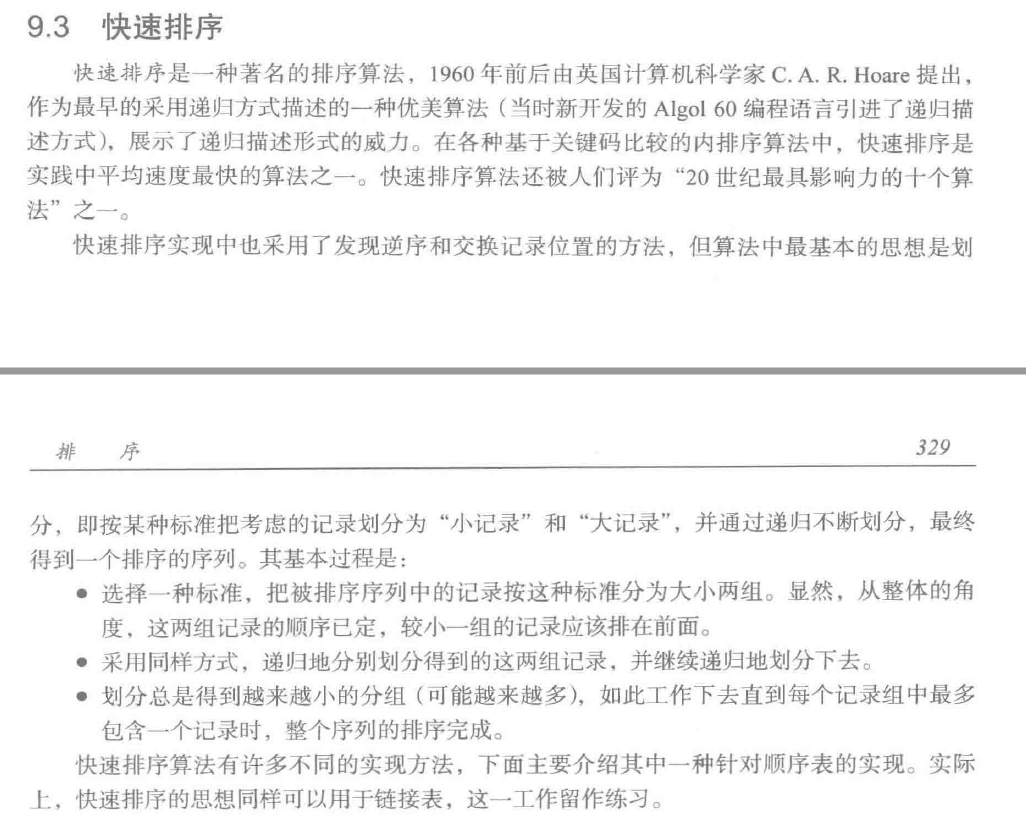

In [ ]:
def quick_sort_rec(lst, l, r):
    if l >= r: 
        return
    i = l 
    j = r 
    pivot = lst[i] 
    while i < j: #i是初始空位
        while i < j and lst[j].key >= pivot.key:
            j -= 1
        if i < j:
            lst[i] = lst[j]
            i += 1
        while i < j and lst[i].key <= pivot.key:
            i += 1
        if i < j:
            lst[j] = lst[i]
            j -= 1
    lst[i] = pivot
    quick_sort_rec(lst, l, i-1)
    quick_sort_rec(lst, i+1, r)

In [ ]:
import numpy as np
#测试
lst = []
rand = np.random.randint(0,10,10)
for i in rand:
    lst.append(record(i, i))

quick_sort_rec(lst, 0, len(lst)-1)
for i in lst:
    print(i.key,end=' ')

In [8]:
def quick(lst,left, right):
    if right <= left:
        return
    
    i = left
    j = right
    mid = lst[i]
    
    while i < j:
        #先从j向左找 小于 mid 的元素，此时 i 为空位
        while i < j and lst[j] >= mid:
            j -= 1
        
        #交换， 此时可能 i == j 但不要紧
        lst[i], lst[j] = lst[j], lst[i]
        
        #从i向右找 大于 mid 此时j为空位
        while i < j and lst[i] <= mid:
            i += 1
        
        lst[i], lst[j] = lst[j], lst[i]
            
    lst[i] = mid
    quick(lst, left, i-1)
    quick(lst, i+1, right)
    

In [12]:
import numpy as np
lst = np.random.randint(0,100,5)
lst

array([ 2,  5, 25,  4, 47])

In [13]:
quick(lst, 0, 4)

In [14]:
lst

array([ 2,  4,  5, 25, 47])

### 归并排序

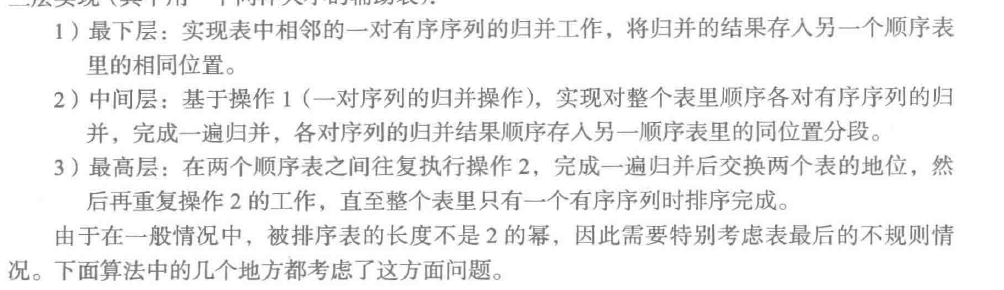

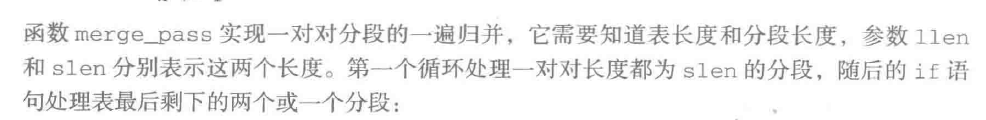
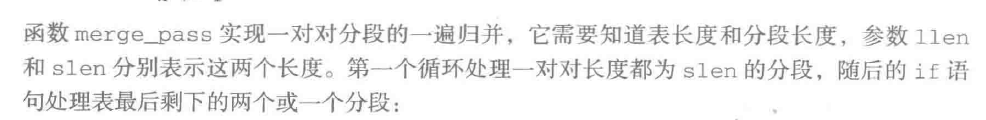

In [98]:
#low指第一段的头，mid指第一段的尾加1，就是第二段的头，high指第二段的尾加1
def merge(lfrom, lto, low, mid, high):
    i, j, k = low, mid, low
    while i < mid and j < high: #第一段和第二段某一段为空时停止该循环
        if lfrom[i].key <= lfrom[j].key: 
            lto[k] = lfrom[i]
            i += 1
        else:
            lto[k] = lfrom[j]
            j += 1
        k += 1
    #下面处理另一段不为空的
    while i < mid:
        lto[k] = lfrom[i]
        i += 1
        k += 1
    while j < high:
        lto[k] = lfrom[j]
        j += 1
        k += 1
    #两个循环只有一个会执行
    
def merge_pass(lfrom, lto, llen, slen):#llen 表长度， slen 分段长度
    i = 0
    while i + 2 * slen <= llen: #这里应该是<=  吗？
        merge(lfrom, lto, i, i + slen, i + 2 * slen)
        i += 2 * slen
        
    #之后处理可能剩下的
    if i + slen < llen: #剩下两段
        merge(lfrom, lto, i, i + slen, llen)
    else: #剩下一段,直接复制过去
        for j in range(i, llen):
            lto[j] = lfrom[j]
            
#主函数
def merge_sort(lst):
    slen, llen = 1, len(lst)
    templst = [None] * llen #辅助表
    while slen < llen:
        merge_pass(lst, templst, llen, slen)
        slen *= 2
        merge_pass(templst, lst, llen, slen)
        slen *= 2
    merge_pass(lst, templst, llen, slen)
    merge_pass(templst, lst, llen, slen)
    
        

In [99]:
class record():
    def __init__(self, key, datum):
        self.key = key
        self.datum = datum

In [123]:
import numpy as np
#测试
rand = np.random.randint(0,100,5)
lst = []
for i in rand:
    lst.append(record(i, i))
merge_sort(lst)
for i in lst:
    print(i.key,end=',')

16,25,51,57,66,

In [28]:
S = "1-401--349---90--88"

In [32]:
node = []
nums= []
c = 0
curs = ''
for j in range(len(S)):
    if S[j] == '-' and S[j-1] != '-':
        node.append(int(curs))
        curs = ''
        nums.append(c)
        c = 1
    elif S[j] == '-':
        c += 1
    else:
        curs += S[j]
node.append(int(curs))
nums.append(c)

In [33]:
node

[1, 401, 349, 90, 88]

In [34]:
nums

[0, 1, 2, 3, 2]

In [20]:
letter = ' a a a   a a   a     c '
letter.split()

['a', 'a', 'a', 'a', 'a', 'a', 'c']

In [5]:
def my_merge(lst):
    if len(lst) == 1:
        return lst
    
    mid = len(lst) // 2
    
    left = my_merge(lst[:mid])
    right = my_merge(lst[mid:])
    
    new_lst = [None] * len(lst)
    i = 0
    j = 0
    k = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            new_lst[k] = left[i]
            i += 1
        else:
            new_lst[k] = right[j]
            j += 1
        
        k += 1
        
    while i < len(left):
        new_lst[k] = left[i]
        i += 1
        k += 1
    
    while j < len(right):
        new_lst[k] = right[j]
        j += 1
        k += 1
    
    return new_lst

In [8]:
test_lst = [1,3,5,7,9,2,4,6,8,10]

In [9]:
my_merge(test_lst)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]